In [127]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [128]:
# Read file

df = pd.read_excel('C:\\Users\\jorge\\Documents\\GitHub\\badly-structured-sales-data\\1.-Badly-Structured-Sales-Data-1.xlsx')

In [129]:
df.head()

,Segment>>,Consumer,Unnamed: 2,Unnamed: 3,Unnamed: 4,Consumer Total,Corporate,Unnamed: 7,Unnamed: 8,Unnamed: 9,Corporate Total,Home Office,Unnamed: 12,Unnamed: 13,Unnamed: 14,Home Office Total
0,Ship Mode>>,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN
1,Order ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.056
3,CA-2011-100706,NaN,NaN,129.44,NaN,129.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA-2011-100895,NaN,NaN,NaN,605.47,605.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Row and column count

df.shape

(825, 16)

In [132]:
# Find columns with unnamed

filt_contains_unnamed = df.columns.str.contains('Unnamed')

# Replace columns with string 'Unnamed'

col_ind = 0

new_cols = []

for i in df.columns.str.contains('Unnamed'):
    if i == True:
        new_cols.append(df.iloc[0, col_ind])
    else:
        new_cols.append(df.columns[col_ind])
    col_ind += 1

df.columns = new_cols

print(df.columns)

Index(['Segment>>', 'Consumer', 'Same Day', 'Second Class', 'Standard Class',
       'Consumer Total', 'Corporate', 'Same Day', 'Second Class',
       'Standard Class', 'Corporate Total', 'Home Office', 'Same Day',
       'Second Class', 'Standard Class', 'Home Office Total'],
      dtype='object')


In [133]:
# Remove special characters from column names

df.columns = df.columns.str.replace('>', '')

# df.columns = df.columns.str.replace('[>, @, #]', '')

print(df.columns)

Index(['Segment', 'Consumer', 'Same Day', 'Second Class', 'Standard Class',
       'Consumer Total', 'Corporate', 'Same Day', 'Second Class',
       'Standard Class', 'Corporate Total', 'Home Office', 'Same Day',
       'Second Class', 'Standard Class', 'Home Office Total'],
      dtype='object')


In [137]:
df.iloc[0]

Segment                 Ship Mode>>
Consumer                First Class
Same Day                   Same Day
Second Class           Second Class
Standard Class       Standard Class
Consumer Total                  NaN
Corporate               First Class
Same Day                   Same Day
Second Class           Second Class
Standard Class       Standard Class
Corporate Total                 NaN
Home Office             First Class
Same Day                   Same Day
Second Class           Second Class
Standard Class       Standard Class
Home Office Total               NaN
Name: 0, dtype: object

In [187]:
df.columns

Index(['Segment', 'Consumer First Class', 'Consumer Same Day',
       'Consumer Second Class', 'Consumer Standard Class', 'Consumer Total',
       'Corporate', 'Consumer Same Day', 'Consumer Second Class',
       'Consumer Standard Class', 'Corporate Total', 'Home Office',
       'Consumer Same Day', 'Consumer Second Class', 'Consumer Standard Class',
       'Home Office Total'],
      dtype='object')

In [186]:
cols_consumer = [i for i in df.iloc[0, 1:5]]
num = 1

for i in cols_consumer:
    test = ' '.join(('Consumer', i))
    df.rename(columns={df.columns[num]: test}, inplace= True)
    print(df.columns[num])
    num += 1

print(df.columns)


Consumer First Class
Consumer Same Day
Consumer Second Class
Consumer Standard Class
Index(['Segment', 'Consumer First Class', 'Consumer Same Day',
       'Consumer Second Class', 'Consumer Standard Class', 'Consumer Total',
       'Corporate', 'Consumer Same Day', 'Consumer Second Class',
       'Consumer Standard Class', 'Corporate Total', 'Home Office',
       'Consumer Same Day', 'Consumer Second Class', 'Consumer Standard Class',
       'Home Office Total'],
      dtype='object')


<AxesSubplot:>

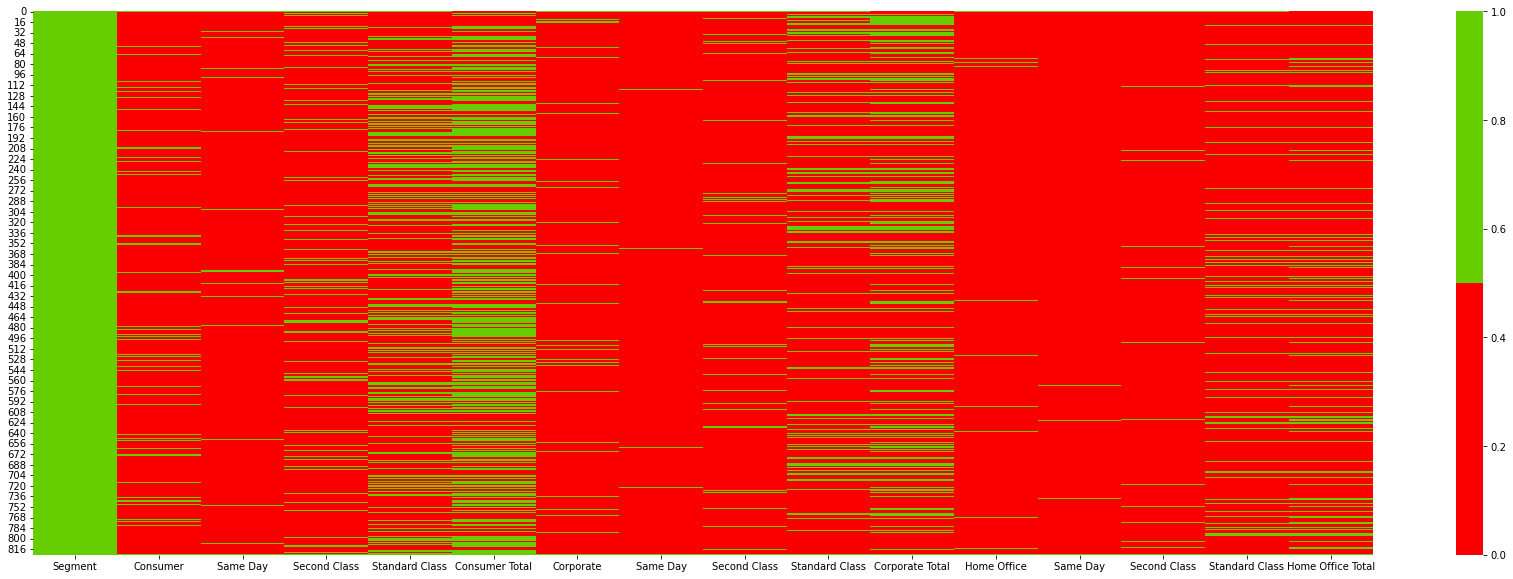

In [134]:
# View empty and non-empty values

nonempty_cells = df.notnull()

plt.subplots(figsize=(30,10))

sns.heatmap(nonempty_cells, cmap=sns.color_palette(['#fa0000', '#66cd00']))

In [135]:
# Empty values per column

filt_empty_consumer = df['Segment'] == np.empty

filt_empty_consumer


0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Name: Segment, Length: 825, dtype: bool

In [136]:
# Meaning of columns